# Restaurant Customer Reviews with (Sentiment Analysis)
## Project Content

***1. Text Preprocessing***

**2. Text Visualization**

**3. Sentiment Analysis**

**4. Sentiment Modeling**


In [1]:
# 1. Warnings Filtering
from warnings import filterwarnings
# 2. Data Visualization and Manipulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 3. Image Processing
from PIL import Image
# 4. Natural Language Processing (NLP)
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
# 5. Machine Learning (ML) Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# 6. Model Selection and Evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
# 7. Data Preprocessing
from sklearn.preprocessing import LabelEncoder
# 8. Text Processing with TextBlob
from textblob import Word, TextBlob
# 9. Word Clouds
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## configure warnings suppression and display settings

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("../input/reviews/Restaurant_Reviews.tsv",delimiter="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Part1. Text Preprocessing

In [4]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.shape

(1000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Normalizing Case Folding

In [7]:
df['Review'] = df['Review'].str.lower()
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


## Removing Punctuation and Digits

In [8]:
# 1. Remove Punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]', '')
# 2. Remove Digits
df['Review'] = df['Review'].str.replace('\d', '')

## Remove Stopwords

In [9]:
# It allows us to get rid of commonly used words.
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

## Removing Rare Words in Text Data

In [10]:
# We drop words according to their frequencies.
drops = pd.Series(' '.join(df['Review']).split()).value_counts()[-250:]
print(drops)
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
print(df['Review'])

margaritas,        1
things.            1
forgetting         1
food...and         1
acknowledged,      1
                  ..
"gold              1
burger...          1
yucky!!!           1
vegas.....there    1
replenished        1
Name: count, Length: 250, dtype: int64
0                                    wow... loved place.
1                                            crust good.
2                                   tasty texture nasty.
3      stopped late may bank holiday rick steve recom...
4                           selection menu great prices.
                             ...                        
995                   think food flavor texture lacking.
996                             appetite instantly gone.
997                     overall impressed would go back.
998    whole experience underwhelming, think we'll go...
999    then, wasted enough life there, poured salt wo...
Name: Review, Length: 1000, dtype: object


## Tokenization

In [11]:
# break sentences into parts
df["Review"].apply(lambda x: TextBlob(x).words).head()

0                                  [wow, loved, place]
1                                        [crust, good]
2                              [tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

In [12]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
!python -m textblob.download_corpora


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-da

In [13]:
df["Review"].head()

0                                  wow... loved place.
1                                          crust good.
2                                 tasty texture nasty.
3    stopped late may bank holiday rick steve recom...
4                         selection menu great prices.
Name: Review, dtype: object

## Calculate the term frequencies

In [14]:
import pandas as pd
import string

# Define a function to clean and preprocess the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply the cleaning function
df['Review'] = df['Review'].apply(clean_text)

# Calculate term frequencies
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]

# Show the result
tf.head()


,words,tf
0,wow,3.00
1,loved,10.00
2,place,106.00
3,crust,2.00
4,good,95.00


In [15]:
tf.shape

(1839, 2)

In [16]:
tf["words"].nunique()

1839

In [17]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   1839.00
mean       3.03
std        6.59
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        3.00
80%        3.00
90%        6.00
95%       10.00
99%       24.62
max      123.00
Name: tf, dtype: float64

In [18]:
# sorted term frequencies (TF)
tf.sort_values("tf", ascending = False)

,words,tf
83,food,123.00
2,place,106.00
4,good,95.00
42,service,83.00
19,great,70.00
...,...,...
1807,tops,1.00
1808,brownish,1.00
1809,obviously,1.00
1810,movies,1.00


## Barplot

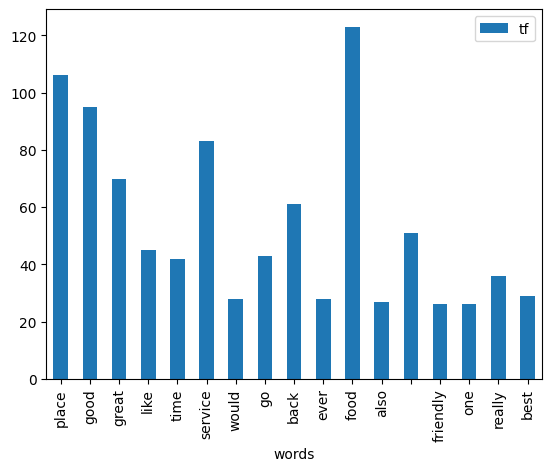

In [19]:
tf[tf["tf"] > 25].plot.bar(x="words", y="tf")
plt.show()

## Wordcloud

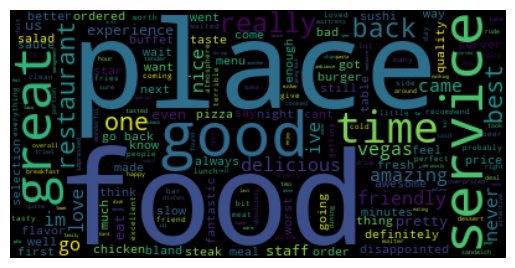

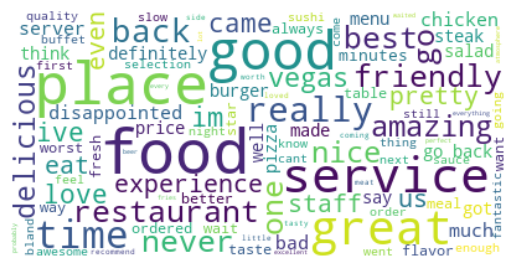

In [20]:
text = " ".join(i for i in df.Review)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# 3. Sentiment Analysis

In [21]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [22]:
df["Review"].apply(lambda x: x.upper())

0                                        WOW LOVED PLACE
1                                             CRUST GOOD
2                                    TASTY TEXTURE NASTY
3      STOPPED LATE MAY BANK HOLIDAY RICK STEVE RECOM...
4                            SELECTION MENU GREAT PRICES
                             ...                        
995                    THINK FOOD FLAVOR TEXTURE LACKING
996                              APPETITE INSTANTLY GONE
997                      OVERALL IMPRESSED WOULD GO BACK
998    WHOLE EXPERIENCE UNDERWHELMING THINK WELL GO N...
999    THEN WASTED ENOUGH LIFE THERE POURED SALT WOUN...
Name: Review, Length: 1000, dtype: object

In [23]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1    {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2    {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
3    {'neg': 0.123, 'neu': 0.452, 'pos': 0.426, 'co...
4    {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
5    {'neg': 0.645, 'neu': 0.215, 'pos': 0.14, 'com...
6    {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...
7    {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
8    {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...
9    {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
Name: Review, dtype: object

In [24]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [25]:
df.head()

,Review,Liked,polarity_score
0,wow loved place,1,0.83
1,crust good,0,0.44
2,tasty texture nasty,0,-0.56
3,stopped late may bank holiday rick steve recom...,1,0.69
4,selection menu great prices,1,0.62


# 4. Sentiment Modeling

In [26]:
# Create the target
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    neg
3    pos
4    pos
5    neg
6    pos
7    pos
8    pos
9    pos
Name: Review, dtype: object

In [27]:
# Apply for all data
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head(20)

,Review,Liked,polarity_score,sentiment_label
0,wow loved place,1,0.83,pos
1,crust good,0,0.44,pos
2,tasty texture nasty,0,-0.56,neg
3,stopped late may bank holiday rick steve recom...,1,0.69,pos
4,selection menu great prices,1,0.62,pos
5,getting angry want damn pho,0,-0.69,neg
6,honeslty taste fresh,0,0.32,pos
7,potatoes like rubber could tell made ahead tim...,0,0.57,pos
8,fries great too,1,0.62,pos
9,great touch,1,0.62,pos


In [28]:
df.groupby("sentiment_label")["Liked"].mean()

sentiment_label
neg   0.23
pos   0.73
Name: Liked, dtype: float64

In [29]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [30]:
X = df["Review"]
y = df["sentiment_label"]

## Count Vectors

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the data (X) and transform the text data into a term count matrix
X_count = vectorizer.fit_transform(X)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Get the term count values for a range of terms (10th to 15th feature)
term_counts = X_count.toarray()[10:15]

# Display feature names and their corresponding term count values
print(feature_names[10:15])
print(term_counts)


['30' '30s' '34ths' '35' '40']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF



In [32]:
# It is the weight factor calculated with the statistical method that shows the importance of a term in the document.
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [33]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)

## Logistic Regression

In [34]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y, scoring="accuracy",
                cv=5).mean()

0.833

In [35]:
random_review = pd.Series(df["Review"].sample(1).values)
random_review

0    love place
dtype: object

In [36]:
new_comment = CountVectorizer().fit(X).transform(random_review)
log_model.predict(new_comment)

array([1])

## Random Forests

In [37]:
rf_model = RandomForestClassifier().fit(X_count, y)
print(cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean())

0.8390000000000001


*TF-IDF Word-Level*

In [38]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
print(cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean())

0.836


## Model Saving and Loading

In [39]:
import joblib

# Save the model
joblib.dump(log_model, 'logistic_regression_model.pkl')

# Load the model
log_model_loaded = joblib.load('logistic_regression_model.pkl')


## Using the Model for Prediction

In [40]:
# Predicting new reviews
new_review = pd.Series(["sangria half glass wine full 12 ridiculous"])
new_review_transformed = tf_idf_word_vectorizer.transform(new_review)

prediction = log_model_loaded.predict(new_review_transformed)
print(prediction)


[0]


## Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define Random Forest parameters for RandomizedSearchCV
rf_params_random = {
    "max_depth": [5, 8, None],
    "max_features": ['sqrt', 5, 7],  # Changed 'auto' to 'sqrt'
    "min_samples_split": [2, 5, 8, 20],
    "n_estimators": [100, 200, 500]
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=17)

In [42]:
# Initialize and fit RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf_model, rf_params_random, cv=5, n_jobs=-1, verbose=True)
rf_random_search.fit(X_count, y)

# Get the best parameters from the RandomizedSearchCV
rf_best_random = rf_random_search.best_params_
print(f"Best Parameters: {rf_best_random}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': None}


## Model Evaluation

In [43]:
# Train the final Random Forest model with the best-found parameters
rf_final_random = rf_model.set_params(**rf_best_random).fit(X_count, y)

# Evaluate the final model using cross-validation
cv_results = cross_validate(rf_final_random, X_count, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Output the cross-validation results
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean()}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean()}")

Mean Accuracy: 0.8460000000000001
Mean F1 Score: 0.8462975185579464
Mean ROC AUC: 0.9190150342573558


# Model Saving and Loading (for Random Forest)

In [44]:
# Save the model
joblib.dump(rf_final_random, 'random_forest_model.pkl')

# Load the model
rf_loaded = joblib.load('random_forest_model.pkl')



# Predicting new reviews with the loaded Random Forest model


In [45]:
new_review = pd.Series(["sangria half glass wine full 12 ridiculous"])
new_review_transformed = tf_idf_word_vectorizer.transform(new_review)

# Predict using the loaded model
prediction = rf_loaded.predict(new_review_transformed)
print(f"Prediction for new review: {prediction}")

Prediction for new review: [0]
